In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = pd.read_csv("/content/drive/MyDrive/datasets/monthly_milk_production.csv", index_col="Date", parse_dates=True);
df.index.freq = "MS" # saying that we are dealing with monthly data

In [4]:
df.head()

,Production
Date,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727


<Axes: xlabel='Date'>

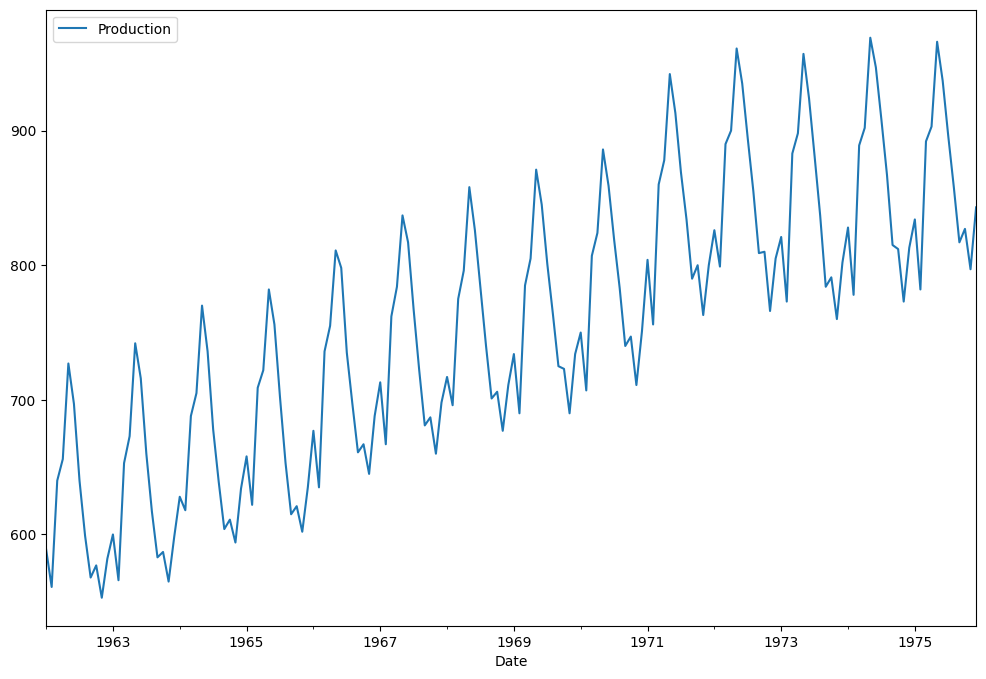

In [5]:
df.plot(figsize=(12,8))

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

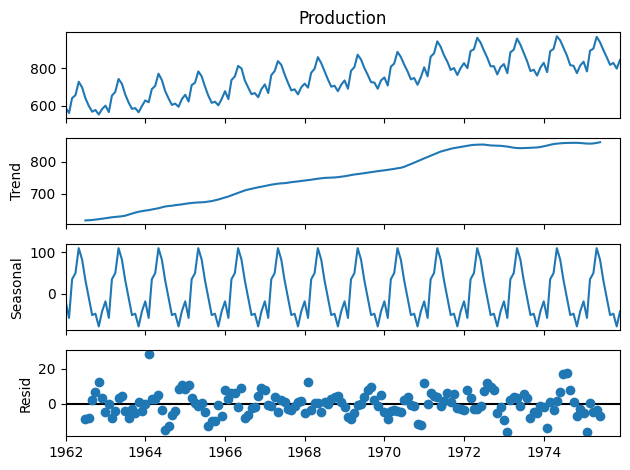

In [7]:
results = seasonal_decompose(df["Production"])
results.plot();

In [8]:
# taking testing and training data
train = df.iloc[:156]
test = df.iloc[156:]

# minmax scaling to scale from 0 to 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [9]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

# defining generator

n_input = 3 # batches of three months at a time
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [10]:
X, y = generator[0]

X.shape

(1, 3, 1)

In [11]:
# we took took the first batch and rest we will predict, the third tuple is number of features

# We do the same thing, but now instead for 12 months
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)


In [12]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [13]:
model = Sequential()
model.add(LSTM(100, activation="relu", input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer="adam", loss="mse")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.fit(generator, epochs=30)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0690
Epoch 2/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0269
Epoch 3/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0227
Epoch 4/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0153
Epoch 5/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0166
Epoch 6/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0089
Epoch 7/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0081
Epoch 8/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0056
Epoch 9/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0069
Epoch 10/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0045
Epoch 11/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0044
Epoch 12/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0058
Epoch 13/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0059
Epoch 14/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0040
Epoch 15/30
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0041

In [16]:
last_train_batch = scaled_train[-12:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [17]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


array([[0.5947611]], dtype=float32)

In [18]:
scaled_test[0] # testing to see the original value since we took the first row

array([0.67548077])

In [19]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [20]:
true_prediction = scaler.inverse_transform(test_predictions)

In [21]:
test["Predictions"] = true_prediction

<ipython-input-21-ec250b1a53bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Predictions"] = true_prediction


<Axes: xlabel='Date'>

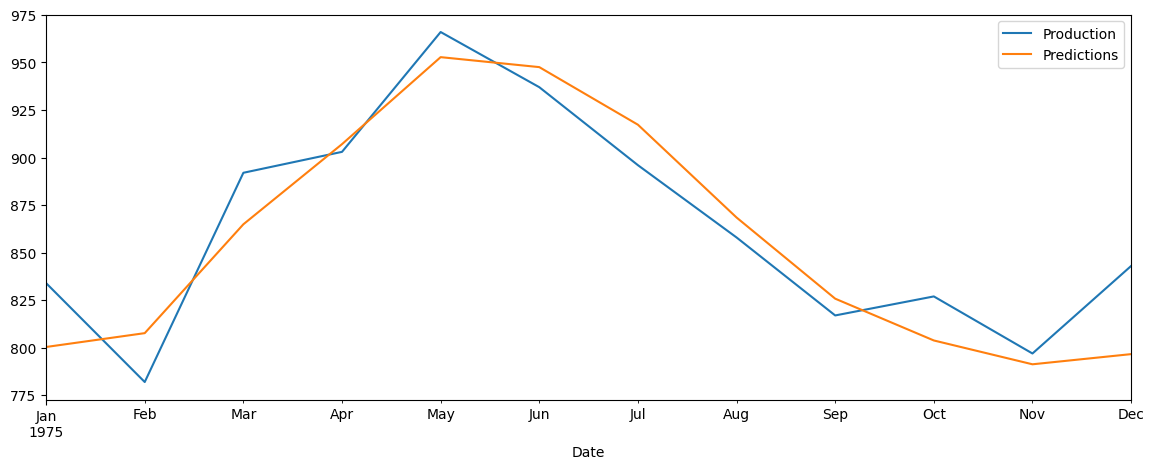

In [22]:
test.plot(figsize=(14,5))

In [23]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test["Production"], test["Predictions"]))

print(rmse)

22.691257249734193
